In [7]:
# Build the response matrix for D0s in jets

from root_numpy import fill_hist
import uproot
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors
import ROOT

Binning setting

In [64]:
Nbins_ptJet = 100
range_ptJet = [0, 100]
Nbins_ptD = 40
range_ptD = [0, 40]
Nbins_z = 20
range_z = [0, 1]

Select which branches will be read from the tree.

In [27]:
var_all = ["cand_type", "inv_mass", "pt_cand", "pt_gen_cand", "pt_jet", "pt_gen_jet", "eta_jet"]
treereco = uproot.open("/home/vkucera/HFjets/data/AnalysisResults_D0Jet_MC.root")["PWGHF_TreeCreator/tree_D0"]
dfreco = treereco.pandas.df(branches = var_all)

In [4]:
treereco.keys()

[b'run_number',
 b'ev_id',
 b'cand_type',
 b'inv_mass',
 b'pt_cand',
 b'pt_gen_cand',
 b'y_cand',
 b'eta_cand',
 b'phi_cand',
 b'd_len',
 b'd_len_xy',
 b'norm_dl_xy',
 b'cos_p',
 b'cos_p_xy',
 b'imp_par_xy',
 b'dca',
 b'cos_t_star',
 b'imp_par_prod',
 b'max_norm_d0d0exp',
 b'norm_dl',
 b'imp_par_prong0',
 b'imp_par_err_prong0',
 b'imp_par_prong1',
 b'imp_par_err_prong1',
 b'pt_prong0',
 b'eta_prong0',
 b'phi_prong0',
 b'p_prong0',
 b'pt_prong1',
 b'eta_prong1',
 b'phi_prong1',
 b'p_prong1',
 b'pt_jet',
 b'pt_gen_jet',
 b'eta_jet',
 b'eta_gen_jet',
 b'phi_jet',
 b'phi_gen_jet',
 b'delta_eta_jet',
 b'delta_eta_gen_jet',
 b'delta_phi_jet',
 b'delta_phi_gen_jet',
 b'delta_r_jet',
 b'delta_r_gen_jet',
 b'ntracks_jet',
 b'ntracks_gen_jet',
 b'zg_jet',
 b'zg_gen_jet',
 b'rg_jet',
 b'rg_gen_jet',
 b'nsigTPC_Pi_0',
 b'nsigTPC_K_0',
 b'nsigTOF_Pi_0',
 b'nsigTOF_K_0',
 b'dEdxTPC_0',
 b'ToF_0',
 b'pTPC_prong0',
 b'pTOF_prong0',
 b'trlen_prong0',
 b'start_time_res_prong0',
 b'nsigTPC_Pi_1',
 b'nsig

In [5]:
treereco.numentries

42685

number of entries =  42685.0


Text(0.5, 0, 'inv_mass')

Warning in <TROOT::Append>: Replacing existing TH1: hinvmass (Potential memory leak).


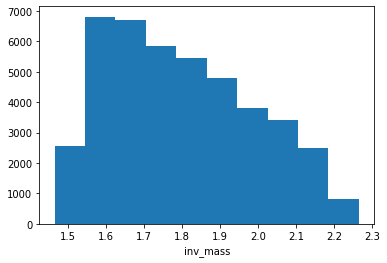

In [30]:
hinvmass = ROOT.TH1D("hinvmass", "hinvmass", 100, 1.5, 2.0)
fill_hist(hinvmass, dfreco["inv_mass"])
print("number of entries = ", hinvmass.GetEntries())
plt.hist(dfreco["inv_mass"])
plt.xlabel("inv_mass")

Text(0.5, 1.0, 'generated pT of D')

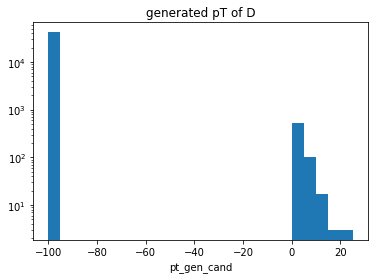

In [35]:
plt.hist(dfreco["pt_gen_cand"], bins = 25, range = [-100, 25])
plt.yscale('log')
plt.xlabel("pt_gen_cand")
plt.title("generated pT of D")

D0 candidates not matched to gen level are stored with pt_gen_cand = -99.

Text(0.5, 1.0, 'reconstructed pt of D')

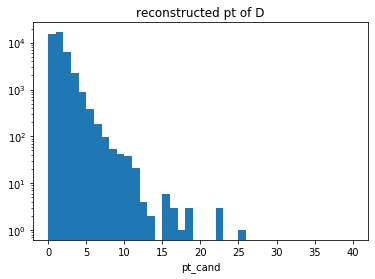

In [65]:
plt.hist(dfreco["pt_cand"], bins = Nbins_ptD, range = range_ptD)
plt.yscale('log')
plt.xlabel("pt_cand")
plt.title("reconstructed pt of D")

Define selection cuts.

In [56]:
is_matched = dfreco["pt_gen_cand"] >= 0 # Unmatched D candidates have pt_gen_cand = -99.
cut_ptDMin = dfreco["pt_cand"] > 2
cut_ptJetMin = dfreco["pt_jet"] > 5
cut_etaJet = abs(dfreco["eta_jet"]) < 0.5 # |eta| < 0.9 - R

Apply cuts and get a data frame with only matched (associated) D0s.

In [ ]:
dfreco_assoc = dfreco[is_matched & cut_ptDMin & cut_ptJetMin & cut_etaJet]

Text(0.5, 1.0, 'reconstructed pt of filtered D')

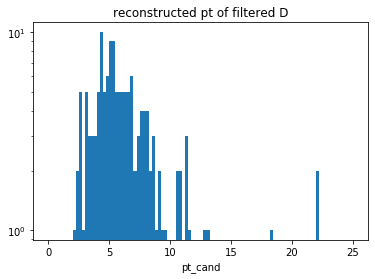

In [54]:
plt.hist(dfreco_assoc["pt_cand"], bins = Nbins_ptD, range = range_ptD)
plt.yscale('log')
plt.xlabel("pt_cand")
plt.title("reconstructed pt of filtered D")

Text(0.5, 1.0, 'reconstructed pt of not matched D')

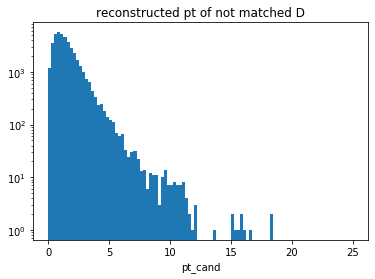

In [41]:
dfreco_nonassoc = dfreco[dfreco["pt_gen_cand"]<0]
plt.hist(dfreco_nonassoc["pt_cand"], bins = Nbins_ptD, range = range_ptD)
plt.yscale('log')
plt.xlabel("pt_cand")
plt.title("reconstructed pt of not matched D")

Text(0.5, 1.0, 'Jet pt of filtered D jets')

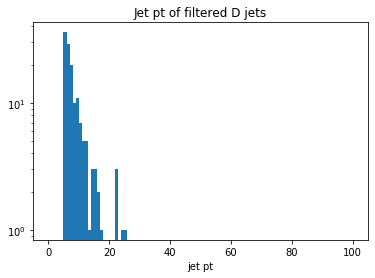

In [66]:
plt.hist(dfreco_assoc["pt_jet"], bins = Nbins_ptJet, range = range_ptJet)
plt.yscale('log')
plt.xlabel("jet pt")
plt.title("Jet pt of filtered D jets")

Text(0.5, 1.0, 'Response matrix for pt of D')

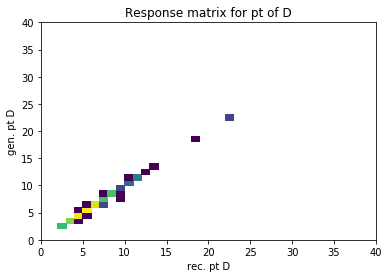

In [68]:
plt.hist2d(dfreco_assoc["pt_cand"], dfreco_assoc["pt_gen_cand"], norm = colors.LogNorm(), bins = [Nbins_ptD, Nbins_ptD], range = [range_ptD, range_ptD])
plt.xlabel("rec. pt D")
plt.ylabel("gen. pt D")
plt.title("Response matrix for pt of D")

Text(0.5, 1.0, 'Response matrix for jet pt')

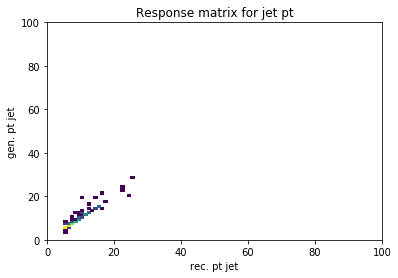

In [70]:
plt.hist2d(dfreco_assoc["pt_jet"], dfreco_assoc["pt_gen_jet"], norm = colors.LogNorm(), bins = [Nbins_ptJet, Nbins_ptJet], range = [range_ptJet, range_ptJet])
plt.xlabel("rec. pt jet")
plt.ylabel("gen. pt jet")
plt.title("Response matrix for jet pt")

In [72]:
hisRespJet = ROOT.TH2D("hisRespJet", \
                       "Response matrix for #it{p}_{T}^{jet, ch};#it{p}_{T}^{jet, ch, rec.};#it{p}_{T}^{jet, ch, gen.}", \
                       Nbins_ptJet, range_ptJet[0], range_ptJet[1], Nbins_ptJet, range_ptJet[0], range_ptJet[1])
# create an empty ROOT histogram for the response matrix
dfRespJet = dfreco_assoc.loc[:, ["pt_jet", "pt_gen_jet"]] # create a data frame with only selected columns
fill_hist(hisRespJet, dfRespJet) # fill the histogram with the data frame entries
hisRespJet.SetDirectory(0) # needed to avoid changing the histogram type to PyROOT_NoneType
fileRootOut = ROOT.TFile("histos.root", "recreate")
fileRootOut.cd()
hisRespJet.Write()
fileRootOut.Close()

Text(0, 0.5, 'gen. z')

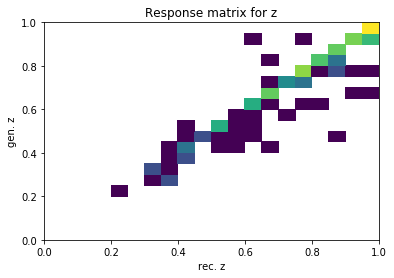

In [73]:
dfreco_assoc.loc[:, "zL"] = dfreco_assoc["pt_cand"] / dfreco_assoc["pt_jet"] # If you type just dfreco_assoc["zL"], it will raise SettingWithCopyWarning.
dfreco_assoc.loc[:, "zL_gen"] = dfreco_assoc["pt_gen_cand"] / dfreco_assoc["pt_gen_jet"]
dfRespZ = dfreco_assoc.loc[:, ["zL", "zL_gen"]]
plt.hist2d(dfRespZ["zL"], dfRespZ["zL_gen"], norm = colors.LogNorm(), bins = [Nbins_z, Nbins_z], range = [range_z, range_z])
plt.title("Response matrix for z")
plt.xlabel("rec. z")
plt.ylabel("gen. z")

In [74]:
binsPtJetMin = [5, 10, 20, 40] # list of minimum jet pt values
listRespZ = [dfRespZ[dfreco_assoc["pt_jet"] > jetpt] for jetpt in binsPtJetMin] # get a list of data frames for jet pt higher than a given threshold from the list
fileRootOut = ROOT.TFile("histos.root", "update")
for i in range(0, len(binsPtJetMin)):
    hisRespZ = ROOT.TH2D("hisRespZ_ptjet{}".format(binsPtJetMin[i]), \
                         "Response matrix for #it{{z}}^{{ch}}, #it{{p}}_{{T}}^{{jet, ch, rec.}} > {} GeV/#it{{c}};#it{{z}}^{{ch, rec.}};#it{{z}}^{{ch, gen.}}".format(binsPtJetMin[i]), \
                         Nbins_z, range_z[0], range_z[1], Nbins_z, range_z[0], range_z[1])
    fill_hist(hisRespZ, listRespZ[i])
    hisRespZ.SetDirectory(0)
    fileRootOut.cd()
    hisRespZ.Write()
fileRootOut.Close()